## <p align="center">Comparing Regression and Deep Learning Models on Texas Housing Price Predictor </p>

![image](image.png)


## This project is a housing price predictor that is able to predict house prices in Texas specifically  the cities of Pflugerville, Del Valle, Austin, driftwood, Manor, Dripping Springs, Manchaca and West Lake Hills.
## This predictor makes prediction based off location, bedrooms, bathrooms, stories, area of the house, basement, parking, hasSpa and lotSize etc.
## The purpose of this project is to compare gradient boosting regresssion, linear regression, polynomial regression and deep learning models to see which model performs best at predicting the propertys' value.


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


# Load the dataset
df = pd.read_csv("austinHousingData.csv")
display(df.head(60))
df.shape


zpid  ...                                          homeImage
0    111373431  ...  111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1    120900430  ...  120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2   2084491383  ...  2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3    120901374  ...  120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4     60134862  ...  60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg
5   2080105342  ...  2080105342_553d16748c296fce71f33902edd98d2d-p_...
6    241932337  ...  241932337_78e2a51227f811bd3c65d6674e8a7939-p_f...
7     60134835  ...  60134835_47efc51704a66b45a8a134022ceeddb1-p_f.jpg
8     60134833  ...  60134833_aa596c71096f40a535ce679c788cae36-p_f.jpg
9     83827468  ...  83827468_017e0605bf1c5f86c4e18c99dd649432-p_f.jpg
10   241932327  ...  241932327_1443918e3814a6c2d9a24f178b2dbdcd-p_f...
11   241930967  ...  241930967_25b11677848df21523b38fd1f11fda1e-p_f...
12    69808966  ...  69808966_a9daf4cb574c0e4861c99c650cd29ded-p_f.jpg
13    64520966  ...  64520966_afb0bd83030f2bbe9c70c186b01967f1-p_f.jpg
14    83813460  ...  83813460_6249601da87b7e0a7b26b5cc13233401-p_f.jpg
15    29470450  ...  29470450_4497ba63bf89d78dbe05edca5b4df55c-p_f.jpg
16    70341946  ...  70341946_9cdad930beeb949715556433fac66f31-p_f.jpg
17   116080992  ...  116080992_83c089e97b4e96ecb01c3555fa8252d0-p_f...
18    88013985  ...  88013985_6d4b35d2a232c42fcc863317f22401c7-p_f.jpg
19    70344594  ...  70344594_3e29ab1c54a4a8ca80360911b9ac7434-p_f.jpg
20   185217484  ...  185217484_1f06634bc9d5424bc0f094f68ca72fe4-p_f...
21   121719682  ...  121719682_4a0a90d12c692fe1bd74b32f2a0dc05f-p_f...
22   116080981  ...  116080981_b15ecd54b82b93b6af1408beb22e069f-p_f...
23    83822421  ...  83822421_d2ee783cf08d78369db622de9d912464-p_f.jpg
24    29462564  ...  29462564_aff81d6f3dad7122ffbbcb7d1f9b5654-p_f.jpg
25    70355992  ...  70355992_6690775f5053ed747a80d221c069391e-p_f.jpg
26    89659978  ...  89659978_d06ef54af4f2b1b2734953be777fdd1a-p_f.jpg
27    70355990  ...  70355990_04f1194f797deba9500ba186fa208bde-p_f.jpg
28    70333917  ...  70333917_38e0174e92f0a3743d95f5d04f1d5a71-p_f.jpg
29    29471292  ...  29471292_a9150842bcf2dc6dae364d7672902d31-p_f.jpg
30   241932966  ...  241932966_46ca4698d275a217ccb3769b948981b9-p_f...
31   116080975  ...  116080975_cac79f1904989e8f3640cbcfc8af9d44-p_f...
32   145656987  ...  145656987_2c1694d51de6eb66a9b07aa072424cee-p_f...
33    83821490  ...  83821490_1d83f660921ba6ef4a3485f358d249a1-p_f.jpg
34    70333915  ...  70333915_0fe8e2a4788af409a614f3d71ecf0716-p_f.jpg
35    29462467  ...  29462467_3f093674703b058a46b604365489a9d5-p_f.jpg
36    89548387  ...  89548387_b6027ef7ab78590dc5a41affbb760d93-p_f.jpg
37    29366912  ...  29366912_2fa103c62c3954827b01dfd5c0fc162a-p_f.jpg
38   241932964  ...  241932964_09dbc9cc200c38b90ad407437650e0ef-p_f...
39    29376494  ...  29376494_d9dabbf0b67c2925b0e601b5527c0e28-p_f.jpg
40    69808963  ...  69808963_db27c0b5ccf2da4dee52c45796a1aa73-p_f.jpg
41   121656950  ...  121656950_01599f7b866d95d24ec6f517e434deeb-p_f...
42   185217474  ...  185217474_73833b9f2238b43e13f8bea4d94f1b0e-p_f...
43    29366911  ...  29366911_27203f417a9aeda9e64c5540f2e3123a-p_f.jpg
44   145657963  ...  145657963_002ab55328769f202926f80ba7905f5f-p_f...
45    29370494  ...  29370494_e0dd4cf4ce44a966f105f7c4f53bed6a-p_f.jpg
46    89548844  ...  89548844_7c09c2874d6229ab2a66778ef49e39a5-p_f.jpg
47   125901465  ...  125901465_d02a94df74ea55600d0eaa1a0b357fc3-p_f...
48    63228462  ...  63228462_cb341a255f875034524d1f4891127c77-p_f.jpg
49    96639474  ...  96639474_cd2c016209f6d3cae48b6b6c34ec7887-p_f.jpg
50    80094409  ...  80094409_18d24472ab3cd2cf322d28f398d940b9-p_f.jpg
51    64431038  ...  64431038_99c51aa620f9878b45ee5ba3a3feb7a2-p_f.jpg
52    89547842  ...  89547842_b6b804760701b8719f049c4d6f544971-p_f.jpg
53   251030464  ...  251030464_c0a5e963f806014e275b749adc5a45ad-p_f...
54    29376491  ...  29376491_0d3f82df2d803552caa7d32f0382da76-p_f.jpg
55   241932962  ...  241932962_d31

(15171, 47)

### Purpose of the Code Below:
The columns listed in columns_to_drop contain information that might seem useful to us like school ratings, photos, or addresses. However, for many types of data analysis or machine learning models, this information doesn’t add much value or might not be directly useful. Computers work best when they only have the necessary data to focus on, especially numeric data, to avoid distractions from irrelevant information.

### Outcome:
By removing these columns, we are simplifying the dataset, making it more focused and manageable for the computer. This helps the computer process the data faster and reduces the chances of errors or confusion when training models. With fewer, more relevant columns, the computer can now make predictions or decisions more effectively, leading to better and faster results in machine learning or data analysis.

In [36]:
# Drop unneeded columns
columns_to_drop = [
    "homeImage", "numOfPrimarySchools", "numOfElementarySchools", "numOfMiddleSchools", 
    "numOfHighSchools", "avgSchoolDistance", "avgSchoolRating", "avgSchoolSize", 
    "MedianStudentsPerTeacher", "description", "latestPriceSource", "latest_saledate", 
    "zpid", "numOfPhotos", "streetAddress"
]

df = df.drop(columns=columns_to_drop)


### Purpose of the Code Below:
The boolean columns (like hasCooling or hasGarage) contain information that is easy for us to understand as True or False. However, computers prefer working with numbers because they can process them more quickly. By turning True into 1 and False into 0, we make it easier for the computer to use these features for calculations and predictions.

Additionally, renaming "latestPrice" to "price" makes the column name clearer and more consistent, making the data easier to understand and work with.

### Outcome:
By encoding the boolean features as 1 or 0, the computer can now interpret and use these features directly in calculations, which is essential for tasks like machine learning. Renaming the column improves readability, making it simpler to work with the data, whether for analysis or building models. This preparation ensures the dataset is ready for more advanced processing.

In [37]:
# Check for missing values and duplicates in the dataframe
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()
print("There are " + str(duplicates) + " duplicates\n\n")
print(missing_values)

There are 0 duplicates


city                          0
zipcode                       0
latitude                      0
longitude                     0
propertyTaxRate               0
garageSpaces                  0
hasAssociation                0
hasCooling                    0
hasGarage                     0
hasHeating                    0
hasSpa                        0
hasView                       0
homeType                      0
parkingSpaces                 0
yearBuilt                     0
latestPrice                   0
numPriceChanges               0
latest_salemonth              0
latest_saleyear               0
numOfAccessibilityFeatures    0
numOfAppliances               0
numOfParkingFeatures          0
numOfPatioAndPorchFeatures    0
numOfSecurityFeatures         0
numOfWaterfrontFeatures       0
numOfWindowFeatures           0
numOfCommunityFeatures        0
lotSizeSqFt                   0
livingAreaSqFt                0
numOfBathrooms                0
numOfBedrooms  

### Purpose of the Code Below:
The boolean columns (like hasCooling or hasGarage) contain information that is easy for us to understand as True or False. However, computers prefer working with numbers because they can process them more quickly. By turning True into 1 and False into 0, we make it easier for the computer to use these features for calculations and predictions.

Additionally, renaming "latestPrice" to "price" makes the column name clearer and more consistent, making the data easier to understand and work with.

### Outcome:
By encoding the boolean features as 1 or 0, the computer can now interpret and use these features directly in calculations, which is essential for tasks like machine learning. Removing the outlier is an important step in my projec because the standard scaler that ill used is sensitive to outliers. The outliers could possibly distort the scaling.

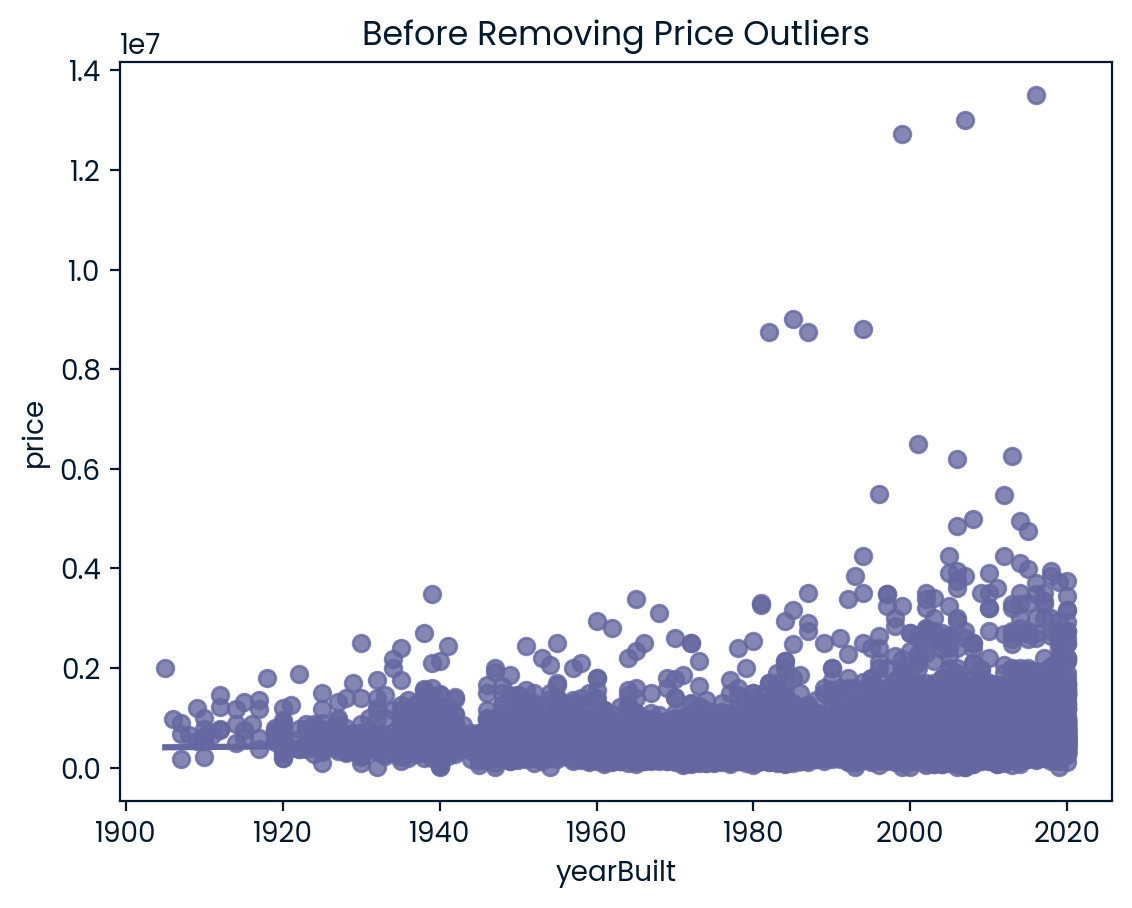

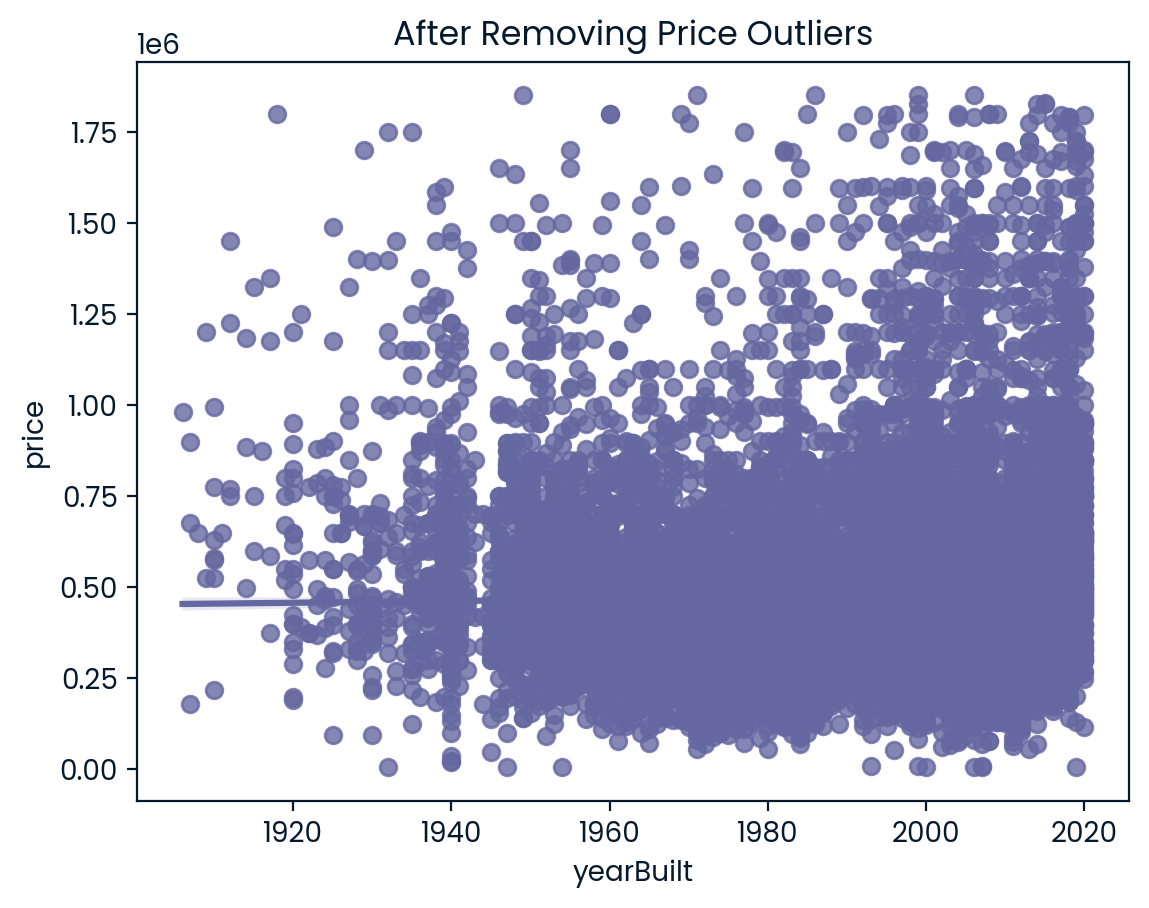

In [38]:
# Rename latestPrice to price
df = df.rename(columns={"latestPrice": "price"})

#Sales prices before outliers
sns.regplot(x= "yearBuilt",y = "price", data=df).set(title="Before Removing Price Outliers")
plt.show()

# Filter out outliers from price using a more robust method (Z-score based)
df = df[(np.abs((df['price'] - df['price'].mean()) / df['price'].std()) < 3)]

#Sales prices after outliers 
sns.regplot(y ="price" ,x="yearBuilt", data=df).set(title="After Removing Price Outliers")
plt.show()

### Purpose of the Code Below:
The boolean columns (like hasCooling or hasGarage) contain information that is easy for us to understand as True or False. However, regression models and deep learning models prefer working with numbers because they can process them more quickly. By turning True into 1 and False into 0, we make it easier for the models to use these features for calculations and predictions.


### Outcome:
By encoding the boolean features as 1 or 0, the computer can now interpret and use these features directly in calculations.

In [39]:
# Feature encode the specified columns
df['city'] = df['city'].astype('category').cat.codes
df['hasAssociation'] = df['hasAssociation'].astype(int)
df['hasCooling'] = df['hasCooling'].astype(int)
df['hasGarage'] = df['hasGarage'].astype(int)
df['hasHeating'] = df['hasHeating'].astype(int)
df['hasSpa'] = df['hasSpa'].astype(int)
df['hasView'] = df['hasView'].astype(int)
df['homeType'] = df['homeType'].astype('category').cat.codes

display(df)

city  zipcode   latitude  ...  numOfBathrooms  numOfBedrooms  numOfStories
0         6    78660  30.430632  ...             3.0              4             2
1         6    78660  30.432673  ...             2.0              4             1
2         6    78660  30.409748  ...             2.0              3             1
3         6    78660  30.432112  ...             2.0              3             1
4         6    78660  30.437368  ...             3.0              3             2
...     ...      ...        ...  ...             ...            ...           ...
15166     0    78748  30.161997  ...             2.0              3             1
15167     0    78741  30.240223  ...             4.0              3             3
15168     0    78704  30.244835  ...             3.0              3             2
15169     0    78722  30.281569  ...             2.0              4             1
15170     0    78702  30.276930  ...             1.0              2             1

[14932 rows x 32 columns]

## Splitting Data into Test and Train Sets

In [40]:
# Preparing features and target variable for Gradient Boosting , Polynomial and Linear Regression
X = df.drop(columns = "price")
y = df["price"]

# One-hot encode categorical variables (like 'homeType' or 'city' for better feature set)
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Shape of Training set and Testing set
print('Original set  ---> ', X.shape, y.shape, '\nTraining set  ---> ', X_train.shape, y_train.shape, '\nTesting set   ---> ', X_test.shape, y_test.shape)

Original set  --->  (14932, 31) (14932,) 
Training set  --->  (11945, 31) (11945,) 
Testing set   --->  (2987, 31) (2987,)


Purpose of the Code Below:
Normalization is a specific form of feature scaling that transforms the range of features to a standard scale. Normalization and, for that matter, any data scaling technique is required only when your dataset has features of varying ranges. Normalization encompasses diverse techniques tailored to different data distributions and model requirements.

Outcome:
Normalizing the data enhances the models performance and improves the accuracy. It aids deep learning and regression models that rely on distance metrics, such as k-nearest neighbors or support vector machines, by preventing features with larger scales from dominating the learning process.The normalization process used here is Standard Scaling which uses the mean and standard deviation.

In [41]:
#initalization of the Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Regression Models Training 

In [42]:
# Linear Regression
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

# Polynomial Regression
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
poly_ridge = GridSearchCV(Ridge(), poly_ridge_params, cv=5)
poly_ridge.fit(X_train_poly, y_train)
poly_ridge_best = poly_ridge.best_estimator_

# Gradient Boosting (a more advanced model)
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)
gbr.fit(X_train_scaled, y_train)

# Random Forest Regression (A more advanced model)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

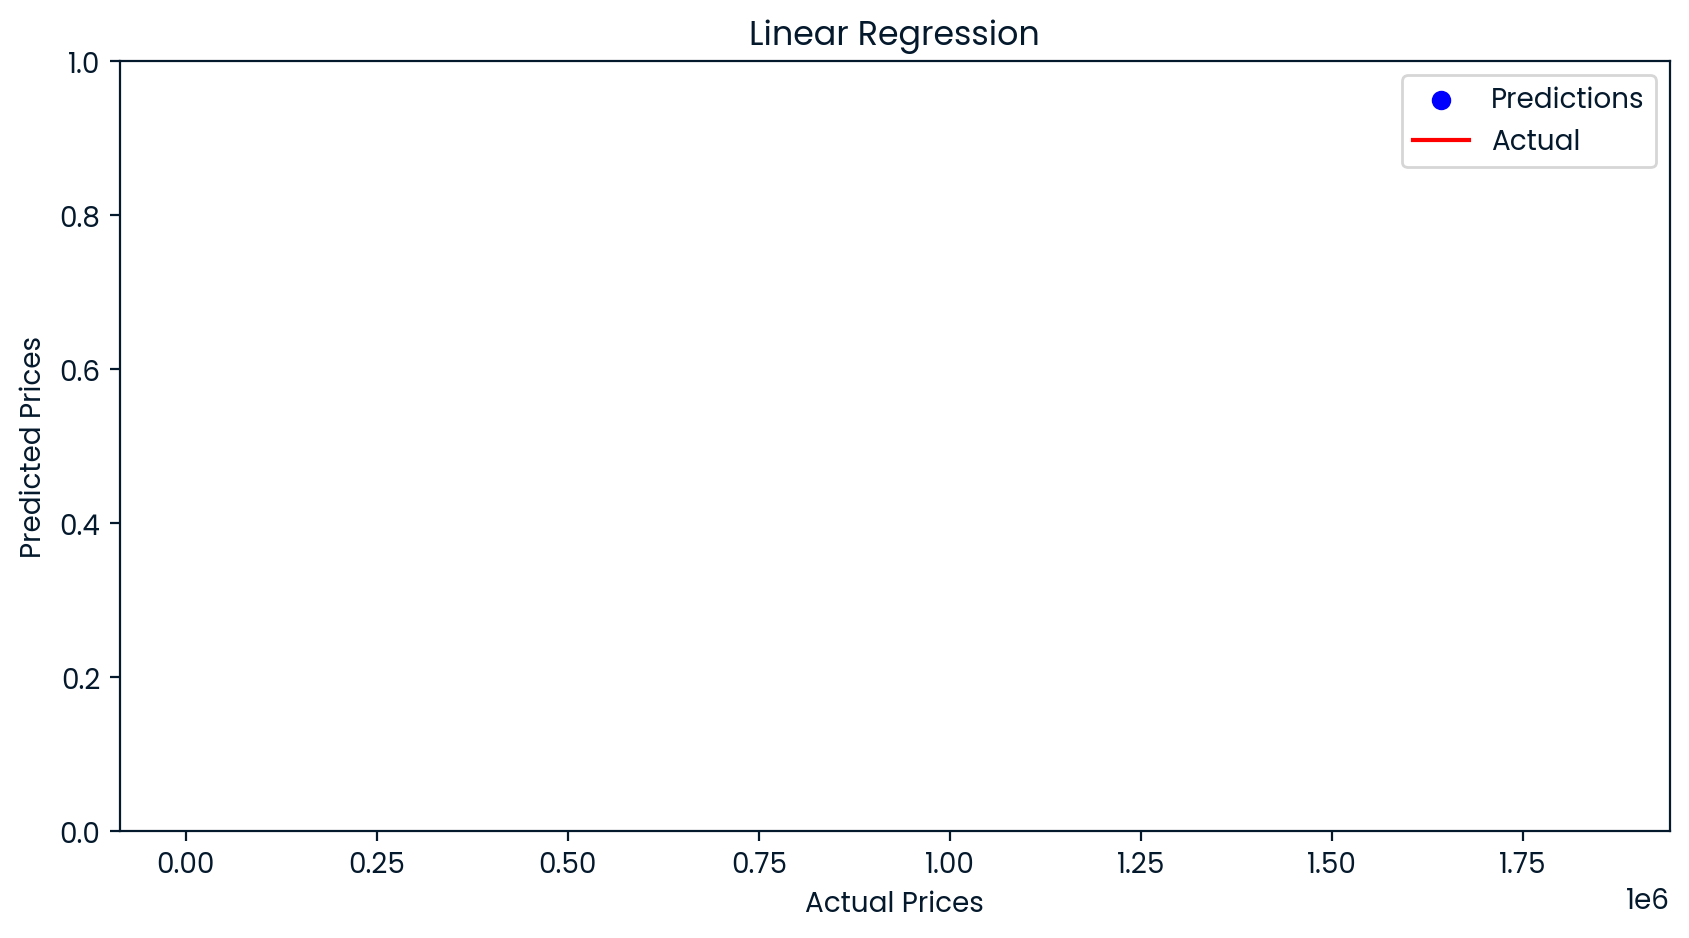

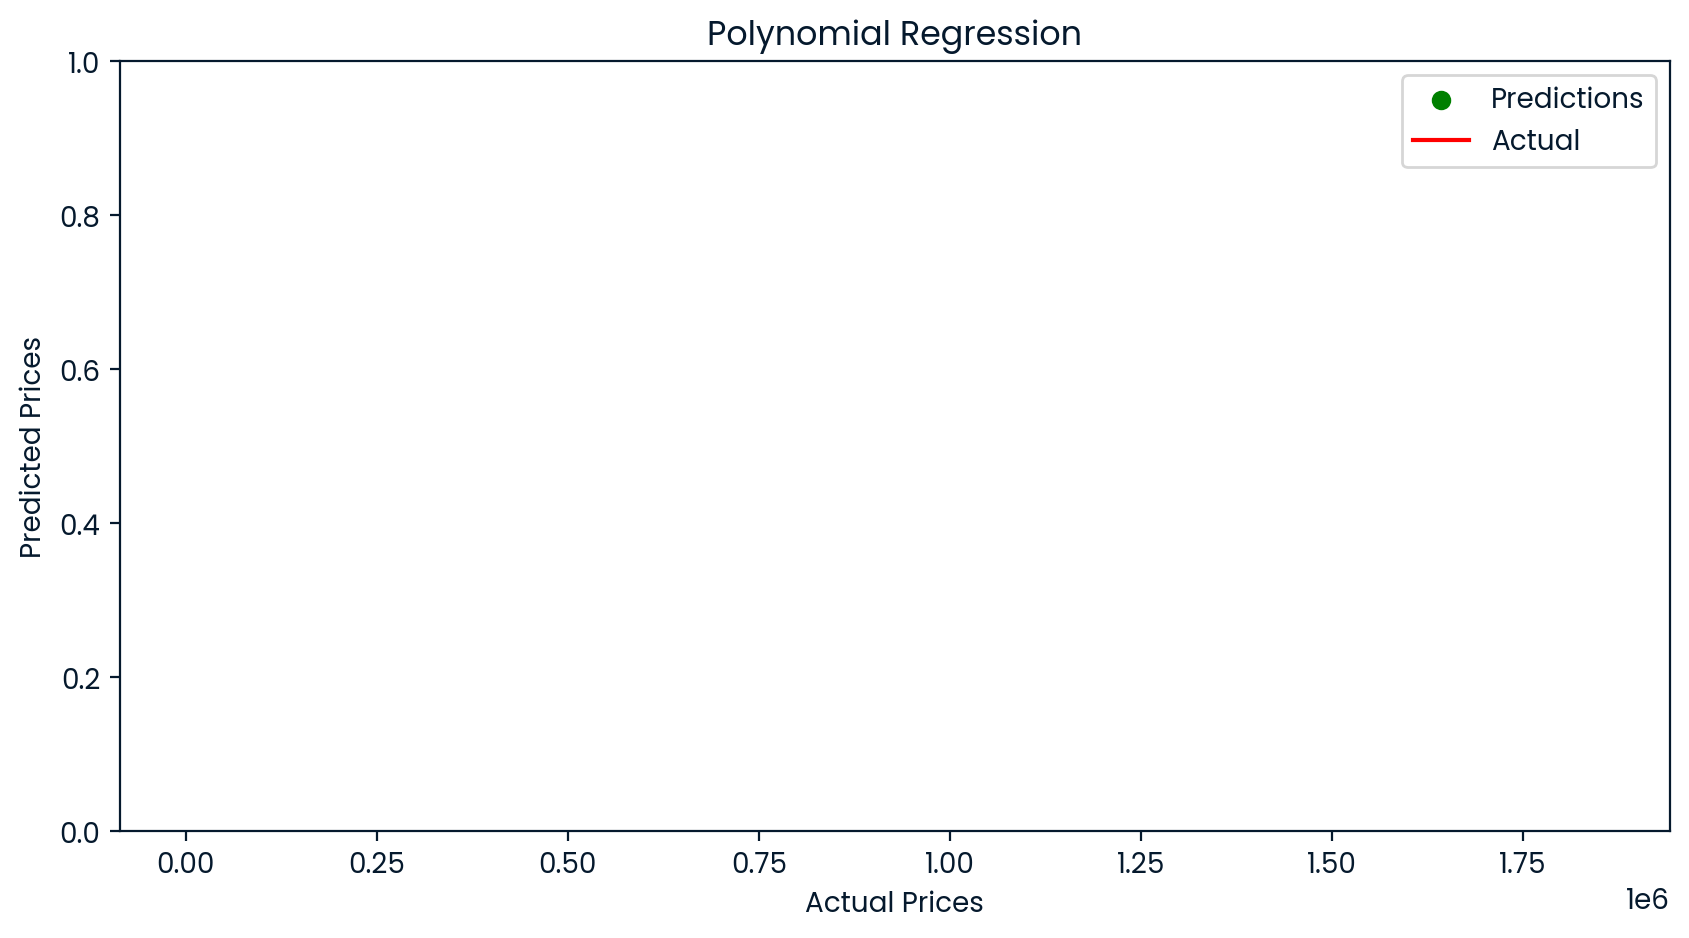

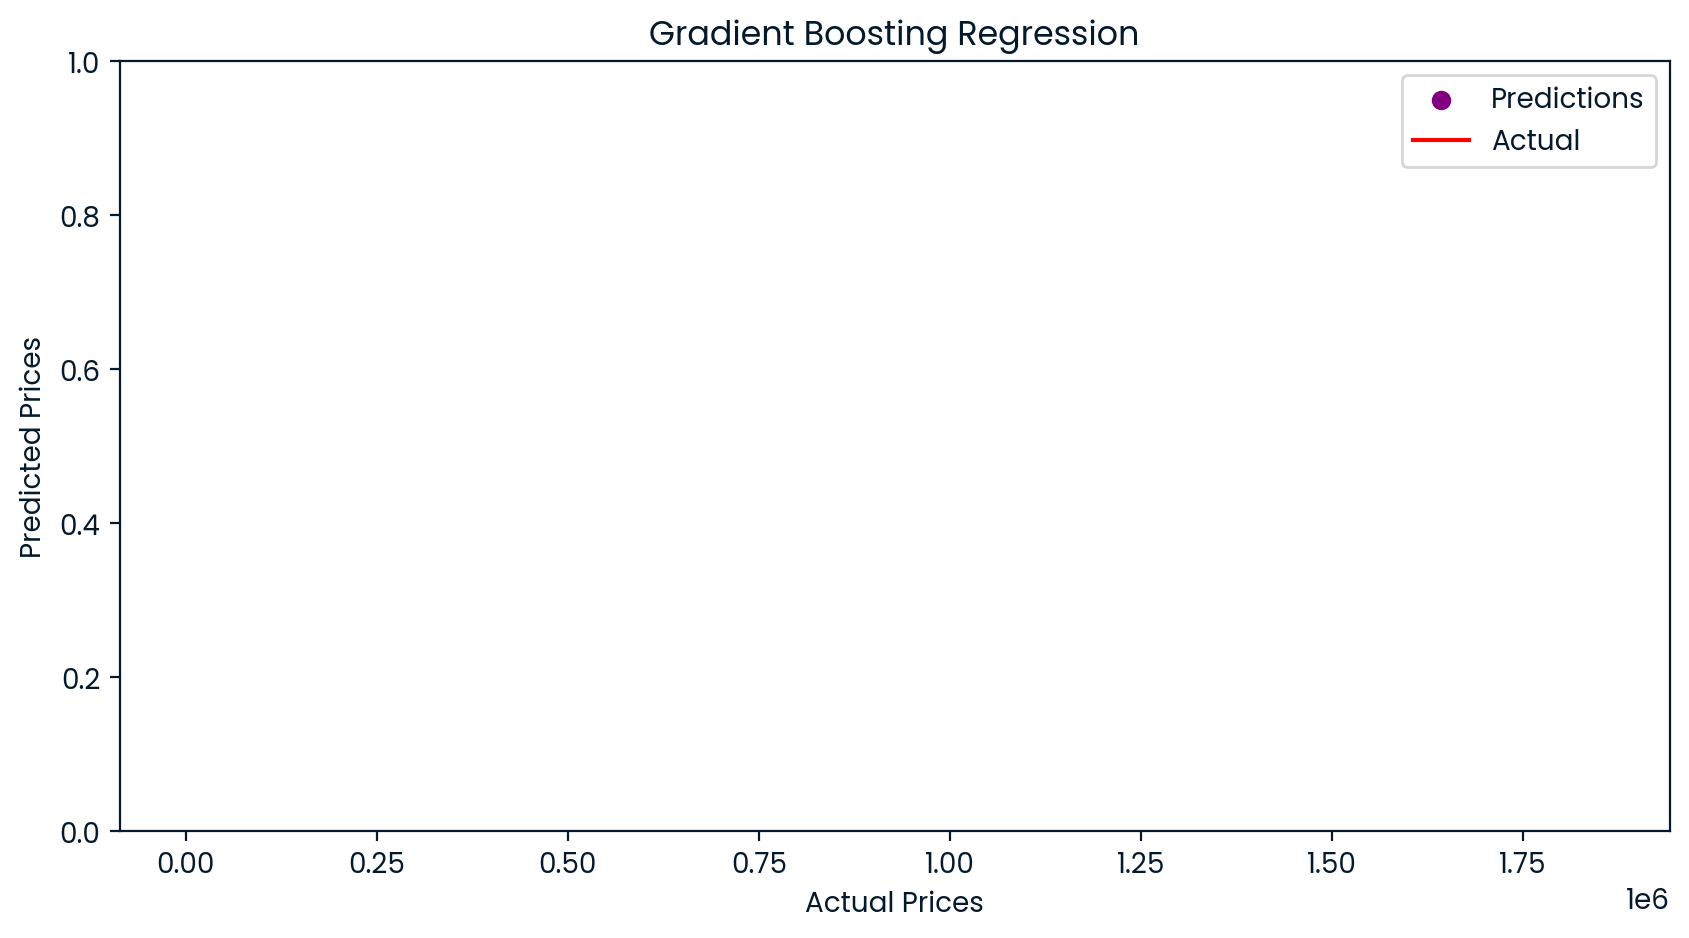

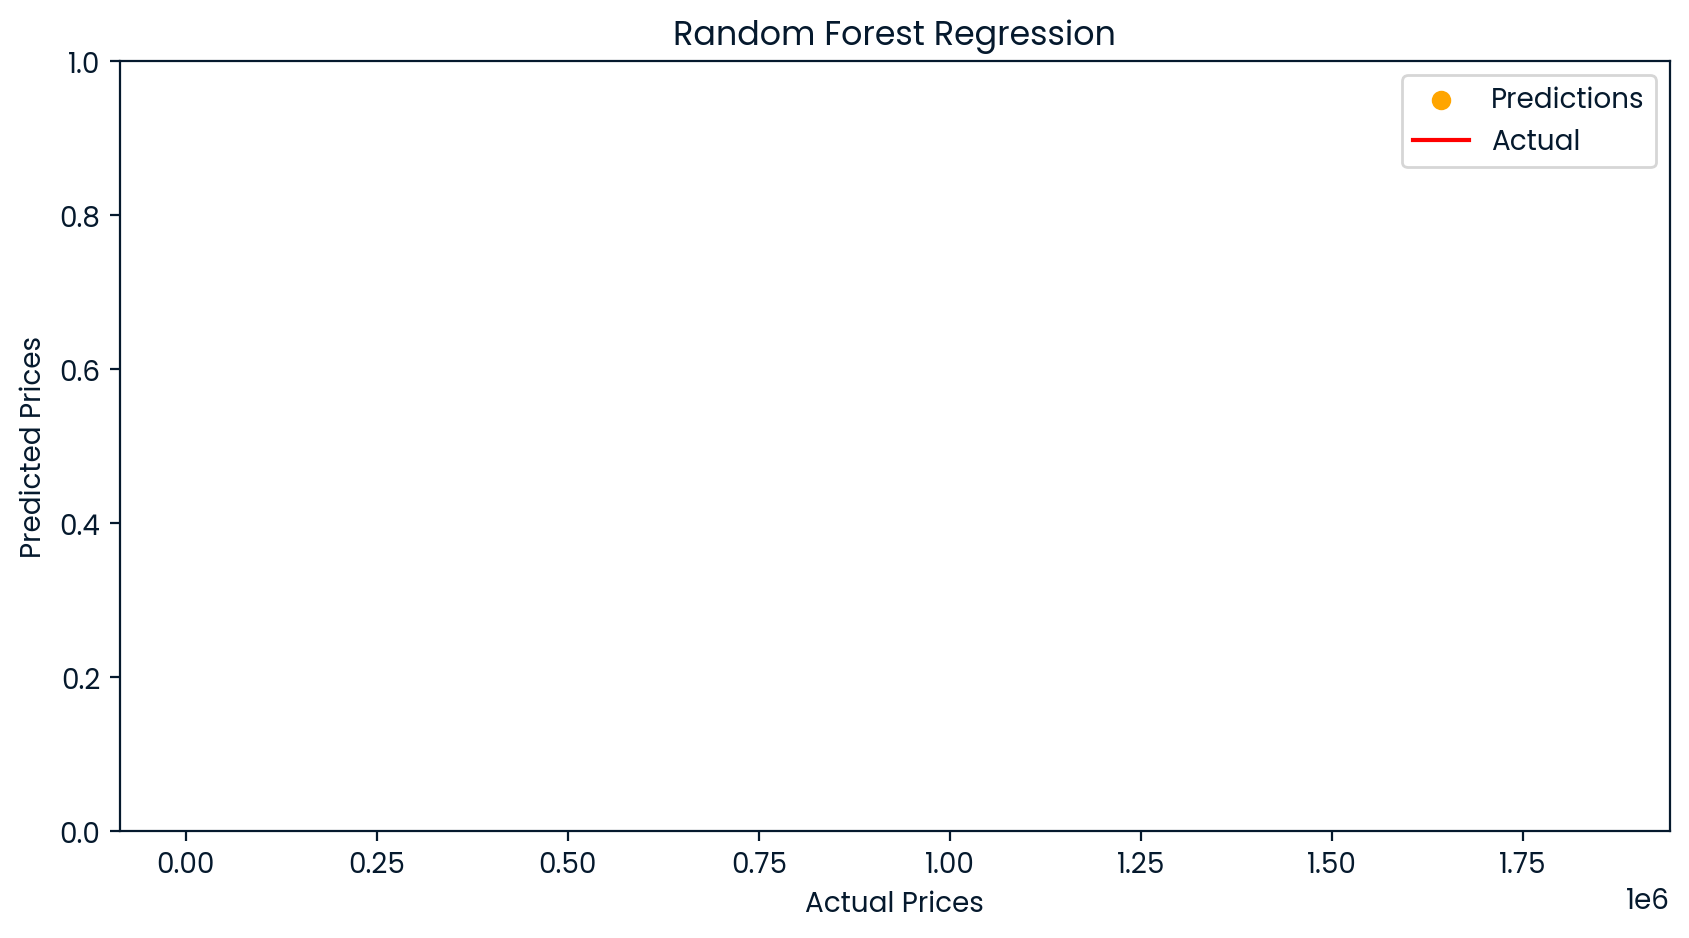

In [43]:
# Predictions
y_pred_linear = linear.predict(X_test_scaled)
y_pred_poly = poly_ridge_best.predict(X_test_poly)
y_pred_gbr = gbr.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

# Plotting Linear Regression
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_linear, color='blue', label='Predictions')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.title('Linear Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.ylim(0,1)
plt.legend()
plt.show()

# Plotting Polynomial Regression
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_poly, color='green', label='Predictions')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.title('Polynomial Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.ylim(0,1)
plt.legend()
plt.show()

# Plotting Gradient Boosting Regression
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_gbr, color='purple', label='Predictions')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.title('Gradient Boosting Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.ylim(0,1)
plt.legend()
plt.show()

# Plotting Random Forest Regression
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, color='orange', label='Predictions')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.title('Random Forest Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.ylim(0,1)
plt.legend()
plt.show()

-0.4114501090157676 -7.2192740555245045 0.7573158352562565 0.779930636172506


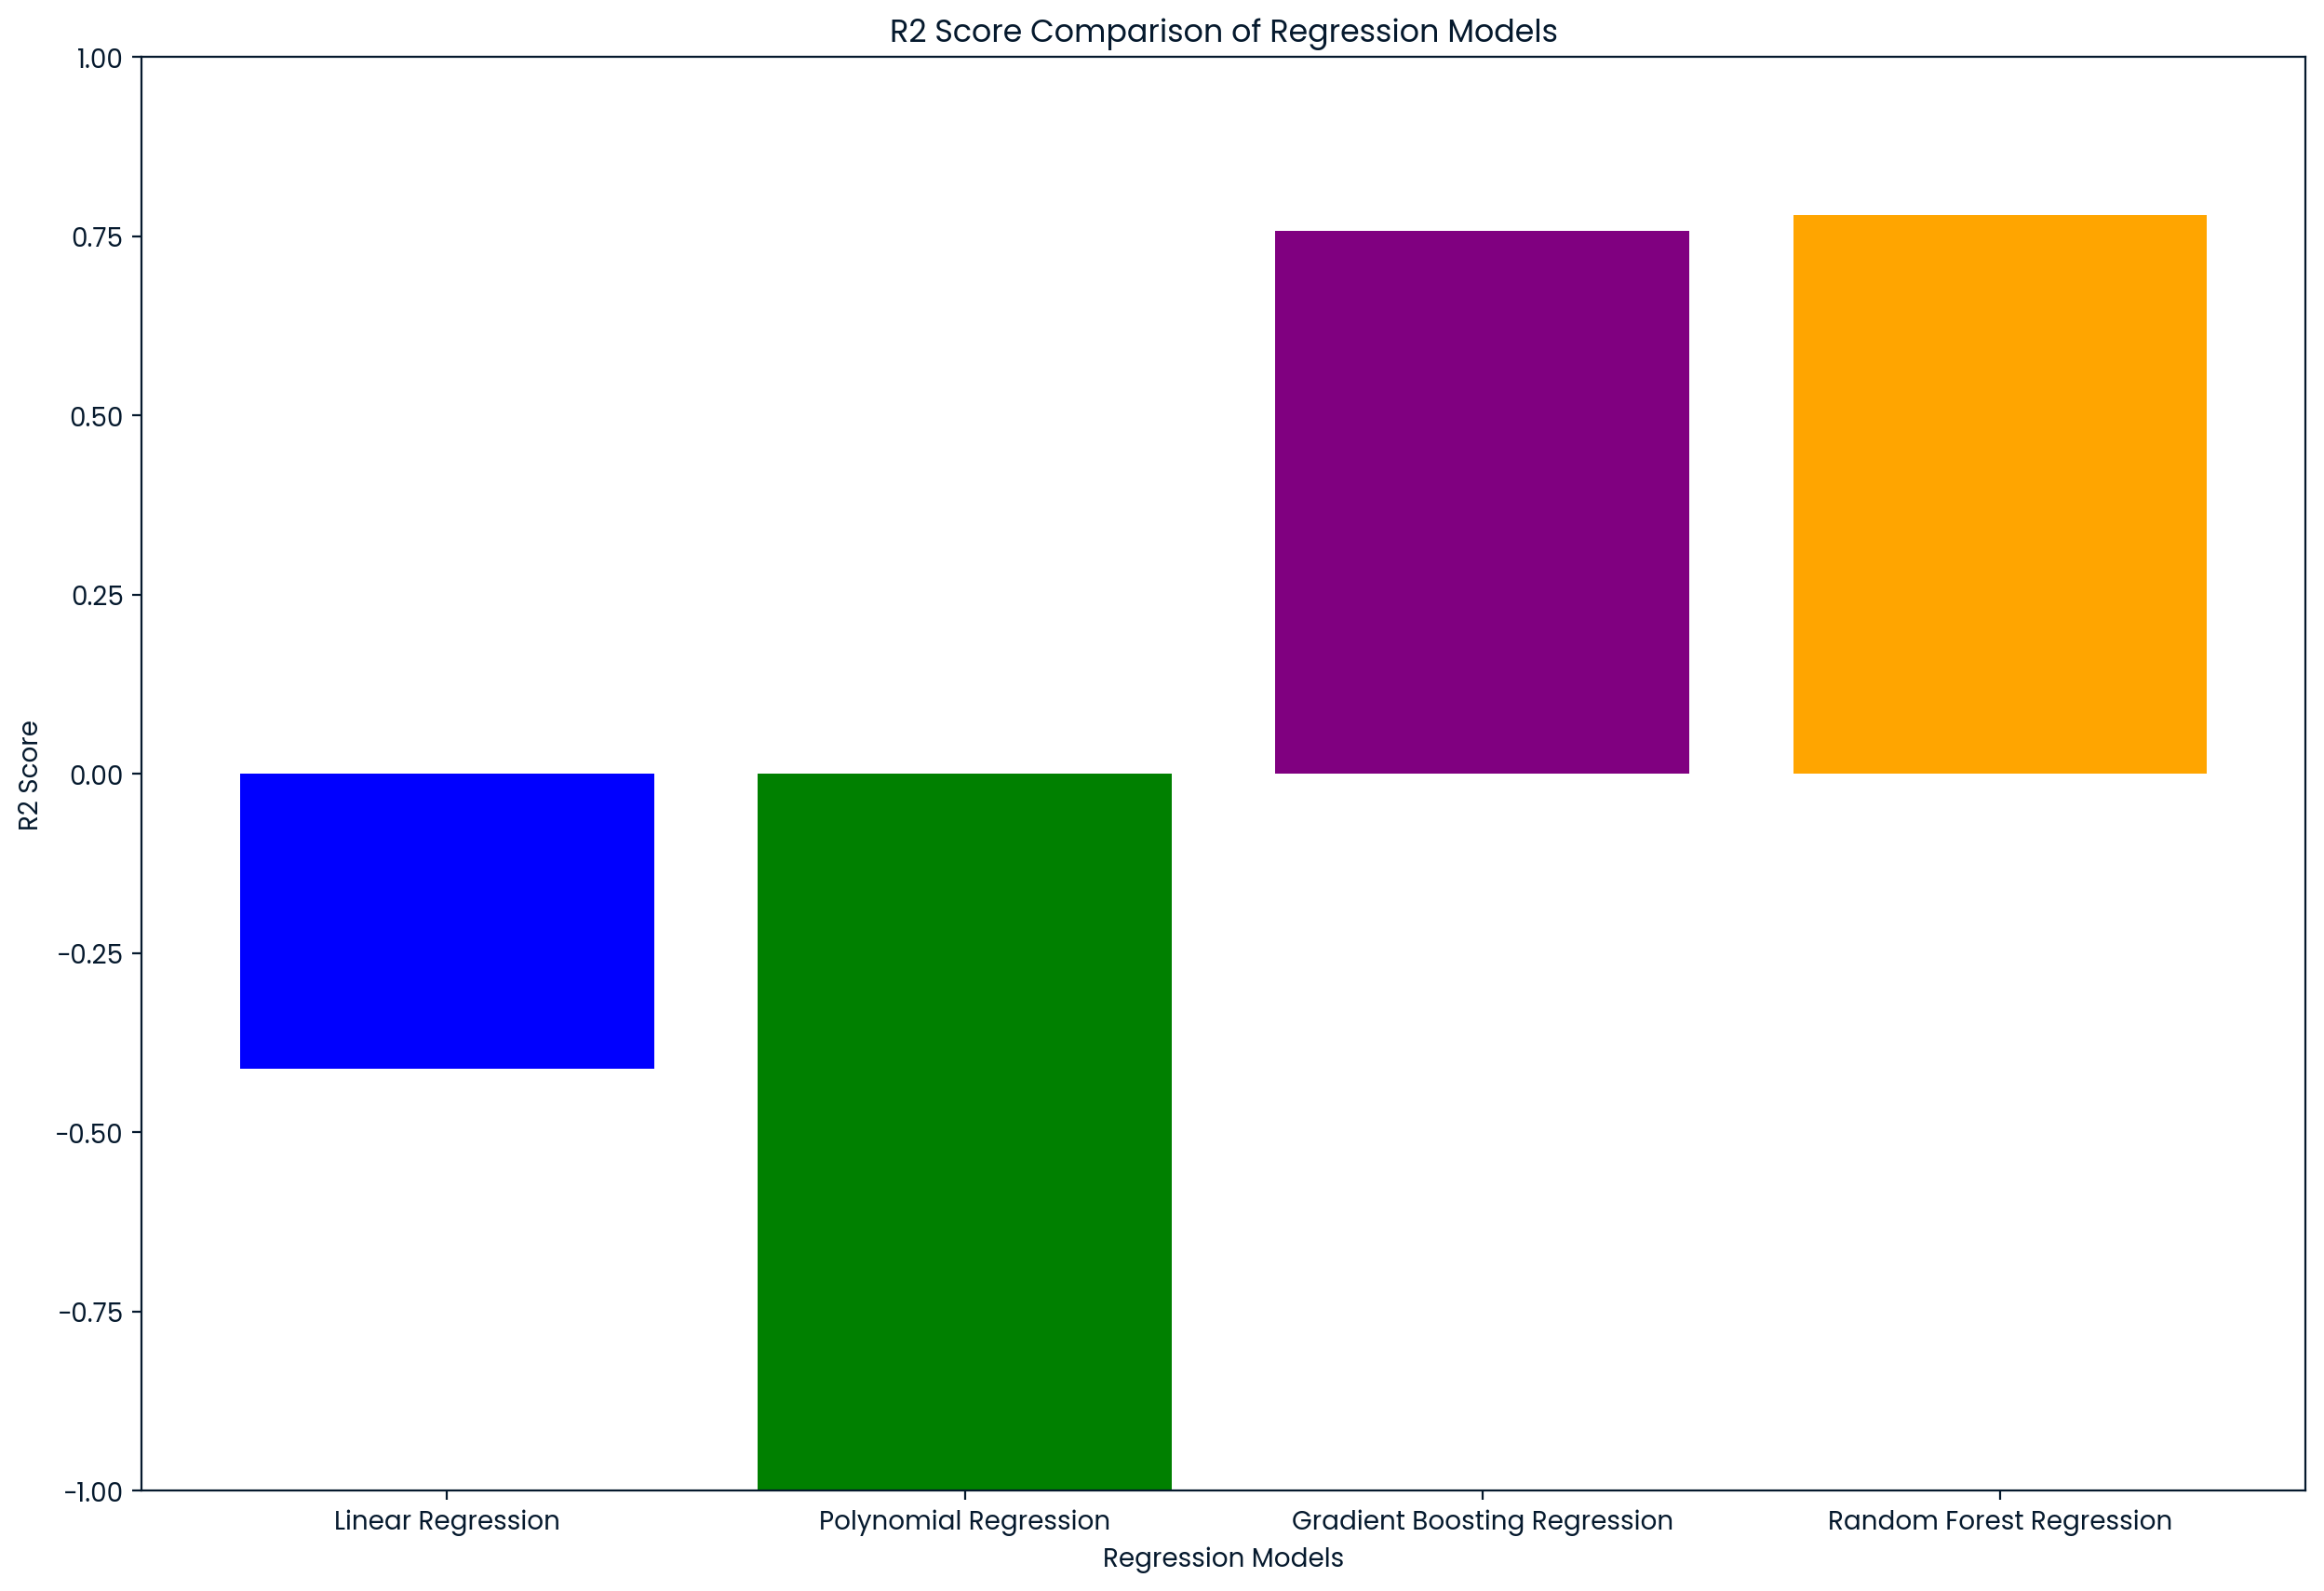

In [44]:
# Calculate R2 scores
r2_linear = r2_score(y_test, y_pred_linear)
r2_poly = r2_score(y_test, y_pred_poly)
r2_gbr = r2_score(y_test, y_pred_gbr)
r2_rf = r2_score(y_test, y_pred_rf)
print(r2_linear, r2_poly, r2_gbr, r2_rf)

# Plotting R2 scores
models = ['Linear Regression', 'Polynomial Regression', 'Gradient Boosting Regression', 'Random Forest Regression']
r2_scores = [r2_linear, r2_poly, r2_gbr, r2_rf]

plt.figure(figsize=(15, 10))
plt.bar(models, r2_scores, color=['blue', 'green', 'purple', 'orange'])
plt.title('R2 Score Comparison of Regression Models')
plt.xlabel('Regression Models')
plt.ylabel('R2 Score')
plt.ylim(-1, 1)
plt.show()

Mean Absolute Error (MAE):
Linear Regression: 130430.02532918636
Polynomial Regression: 110189.85361879066
Random Forrest Regression: 75947.66264479411

Root Mean Squared Error (RMSE):
Linear Regression: 322345.5468079537
Polynomial Regression: 777867.5233895289
Gradient Boosting Regression: 133662.5150374453
Random Forrest Regression: 127282.50180889782


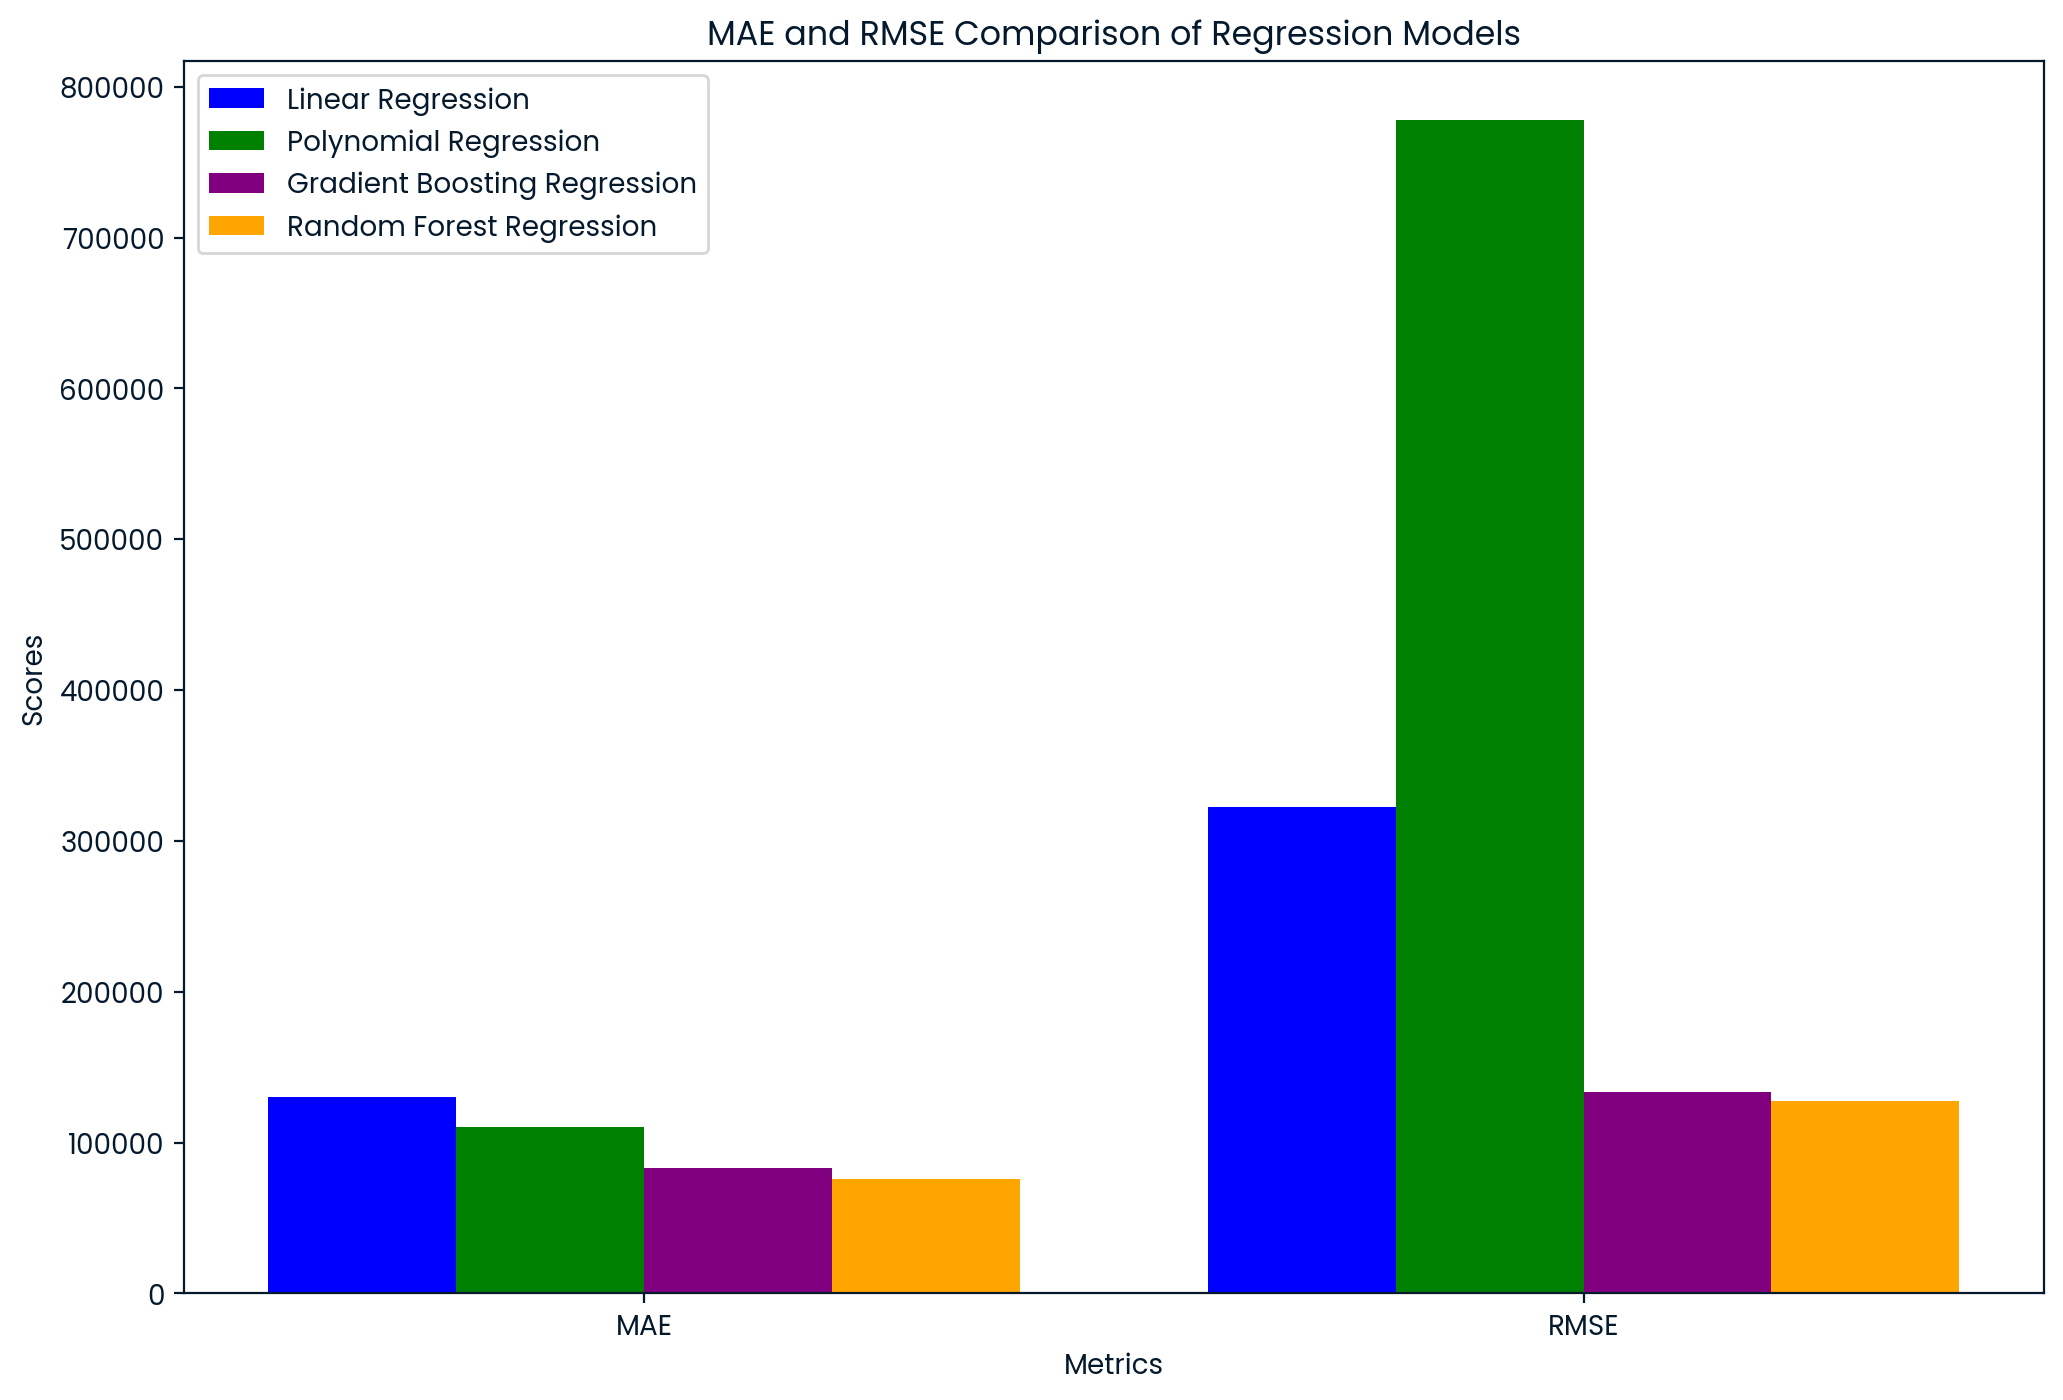

In [45]:
# Calculate Mean Absolute Error (MAE)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Calculate Root Mean Squared Error (RMSE)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Mean Absolute Error (MAE):")
print(f"Linear Regression: {mae_linear}")
print(f"Polynomial Regression: {mae_poly}")
print(f"Random Forrest Regression: {mae_rf}")
 
print("\nRoot Mean Squared Error (RMSE):")
print(f"Linear Regression: {rmse_linear}")
print(f"Polynomial Regression: {rmse_poly}")
print(f"Gradient Boosting Regression: {rmse_gbr}")
print(f"Random Forrest Regression: {rmse_rf}")


# MAE and RMSE for each model
mae_scores = [mae_linear, mae_poly, mae_gbr, mae_rf]
rmse_scores = [rmse_linear, rmse_poly, rmse_gbr, rmse_rf]

# Plotting MAE and RMSE scores
metrics = ['MAE', 'RMSE']
linear_scores = [mae_linear, rmse_linear]
poly_scores = [mae_poly, rmse_poly]
gbr_scores = [mae_gbr, rmse_gbr]
rf_scores = [mae_rf, rmse_rf]

x = np.arange(len(metrics))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - 1.5*width, linear_scores, width, label='Linear Regression', color='blue')
rects2 = ax.bar(x - 0.5*width, poly_scores, width, label='Polynomial Regression', color='green')
rects3 = ax.bar(x + 0.5*width, gbr_scores, width, label='Gradient Boosting Regression', color='purple')
rects4 = ax.bar(x + 1.5*width, rf_scores, width, label='Random Forest Regression', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('MAE and RMSE Comparison of Regression Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

#fig.tight_layout()
plt.show()

## Deep Learning Model Training

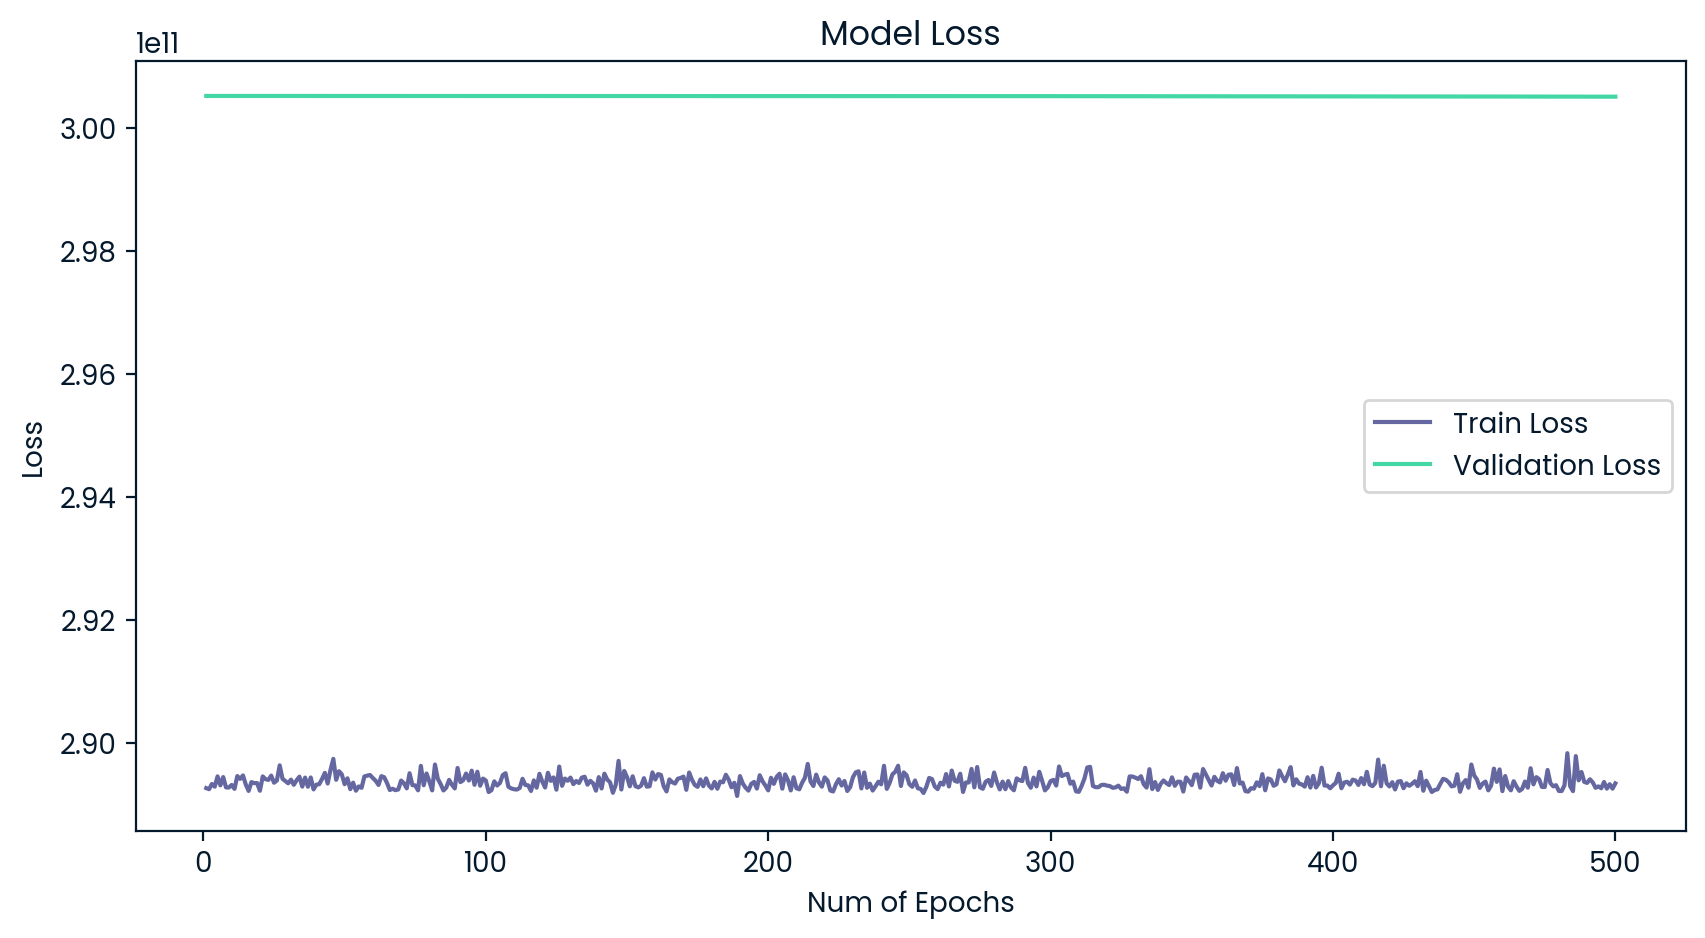

Test Loss: 304001908736.0000


In [46]:
# Changing DataFrame to PyTorch tensors
X_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

# Creating dataset and splitting into training and validation sets
dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Creating data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Defining the neural network model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initializing the model, loss function, and optimizer
input_dim = X_train_scaled.shape[1]
model = RegressionModel(input_dim)
criterion = nn.MSELoss()

# The initializes the learning rate 
optimizer = optim.Adam(model.parameters(), lr=0.000001)

# This is a learning rate scheduler that decreases the learning rate during training
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Early stopping parameters
early_stopping_patience = 10
best_val_loss = float('inf')
patience_counter = 0

# Training loop
num_epochs = 500
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    # Validation loop
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
    
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    
    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1
    
    if patience_counter >= early_stopping_patience:
        print(f'Early stopping at epoch {epoch+1}')
        break

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses)+1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation Loss')
plt.xlabel('Num of Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# Evaluate on test set
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)
print(f'Test Loss: {test_loss:.4f}')

In [47]:
#Function used to test the models by inputing the features of the house then it outputs the predicted price of each model 

def housesPriceEstimator(house_data, actualPrice):
    
    houseDataDf = pd.DataFrame([house_data])
    
    # Encoding categorical variables
    house_df_encoded = pd.get_dummies(houseDataDf, drop_first=True)

    # Aligning the new data with the training data
    house_df_encoded = house_df_encoded.reindex(columns=X.columns, fill_value=0)
    
    # Scaling the features for the example test set
    house_df_scaled = scaler.transform(house_df_encoded)

    # Converting houseData from DataFrame to Tensor
    houseDataTensor = torch.tensor(house_df_encoded.values, dtype=torch.float32)
    
    # Making predictions using the Deep learning Model
    model.eval()   
    # Disable gradient calculation
    with torch.no_grad(): 
        predictions = model(houseDataTensor)
    # Outputting the predictions done by the Feedforward Deep Learning Model
    prediction_value = predictions[0].item()
    print(f'Feedforward Deep Learning Model: ${round(prediction_value,2)}')
    
    # Prediction using the regression models
    gbr_prediction = gbr.predict(house_df_scaled)
    rf_prediction = rf.predict(house_df_scaled)
    linear_prediction = linear.predict(house_df_scaled)
    poly_house_scaled = poly.transform(house_df_scaled)
    poly_prediction = poly_ridge_best.predict(poly_house_scaled)

    # Print the Regression predictions
    print(f'Actual Price: ${actualPrice}')
    print(f'Gradient Boosting Prediction: ${round(gbr_prediction[0],2)}')
    print(f'Random Forest Prediction: ${round(rf_prediction[0],2)}')
    print(f'Linear Prediction: ${round(linear_prediction[0],2)}')
    print(f'Polynomial Prediction: ${round(poly_prediction[0],2)}')
    
    # Plotting the actual price vs model predictions
    predictions = {
        'Actual Price': actualPrice,
        'Feedforward DL': prediction_value,
        'Gradient Boosting': gbr_prediction[0],
        'Random Forest': rf_prediction[0],
        'Linear Regression': linear_prediction[0],
        'Polynomial Regression': poly_prediction[0]
    }
    
    plt.figure(figsize=(10, 6))
    plt.bar(predictions.keys(), predictions.values(), color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
    plt.xlabel('Model')
    plt.ylabel('Price')
    plt.title('Actual Price vs Model Predictions')
    plt.xticks(rotation=45)
    plt.show()

## Testing The Models 

Enter the actual price for the house: 400000
Enter the city in Austin: austin
Enter the zipcode: 78734
Enter the latitude: 30.412185
Enter the longitude: -97.918853
Enter the property tax rate: 2.17
Enter the number of garage spaces: 4
Does the property have a housing association? (yes/no): yes
Does the property have cooling? (yes/no): no
Does the property have a garage? (yes/no): yes
Does the property have heating? (yes/no): no
Does the property have a spa? (yes/no): no
Does the property have a view? (yes/no): yes
What is the property home type? Single Family
How many parking spaces does the property have? 4
What is the year the property was built? 1995
How many price changes has the property undergone? 10
What is the latest sale month? 4
What is the latest sale year? 2019
Enter the number of accessibility features: 0
How many appliances does the property have? 5
How many parking features does the property have? 4
How many patio and porch features? 2
How many security features? 0
Numb

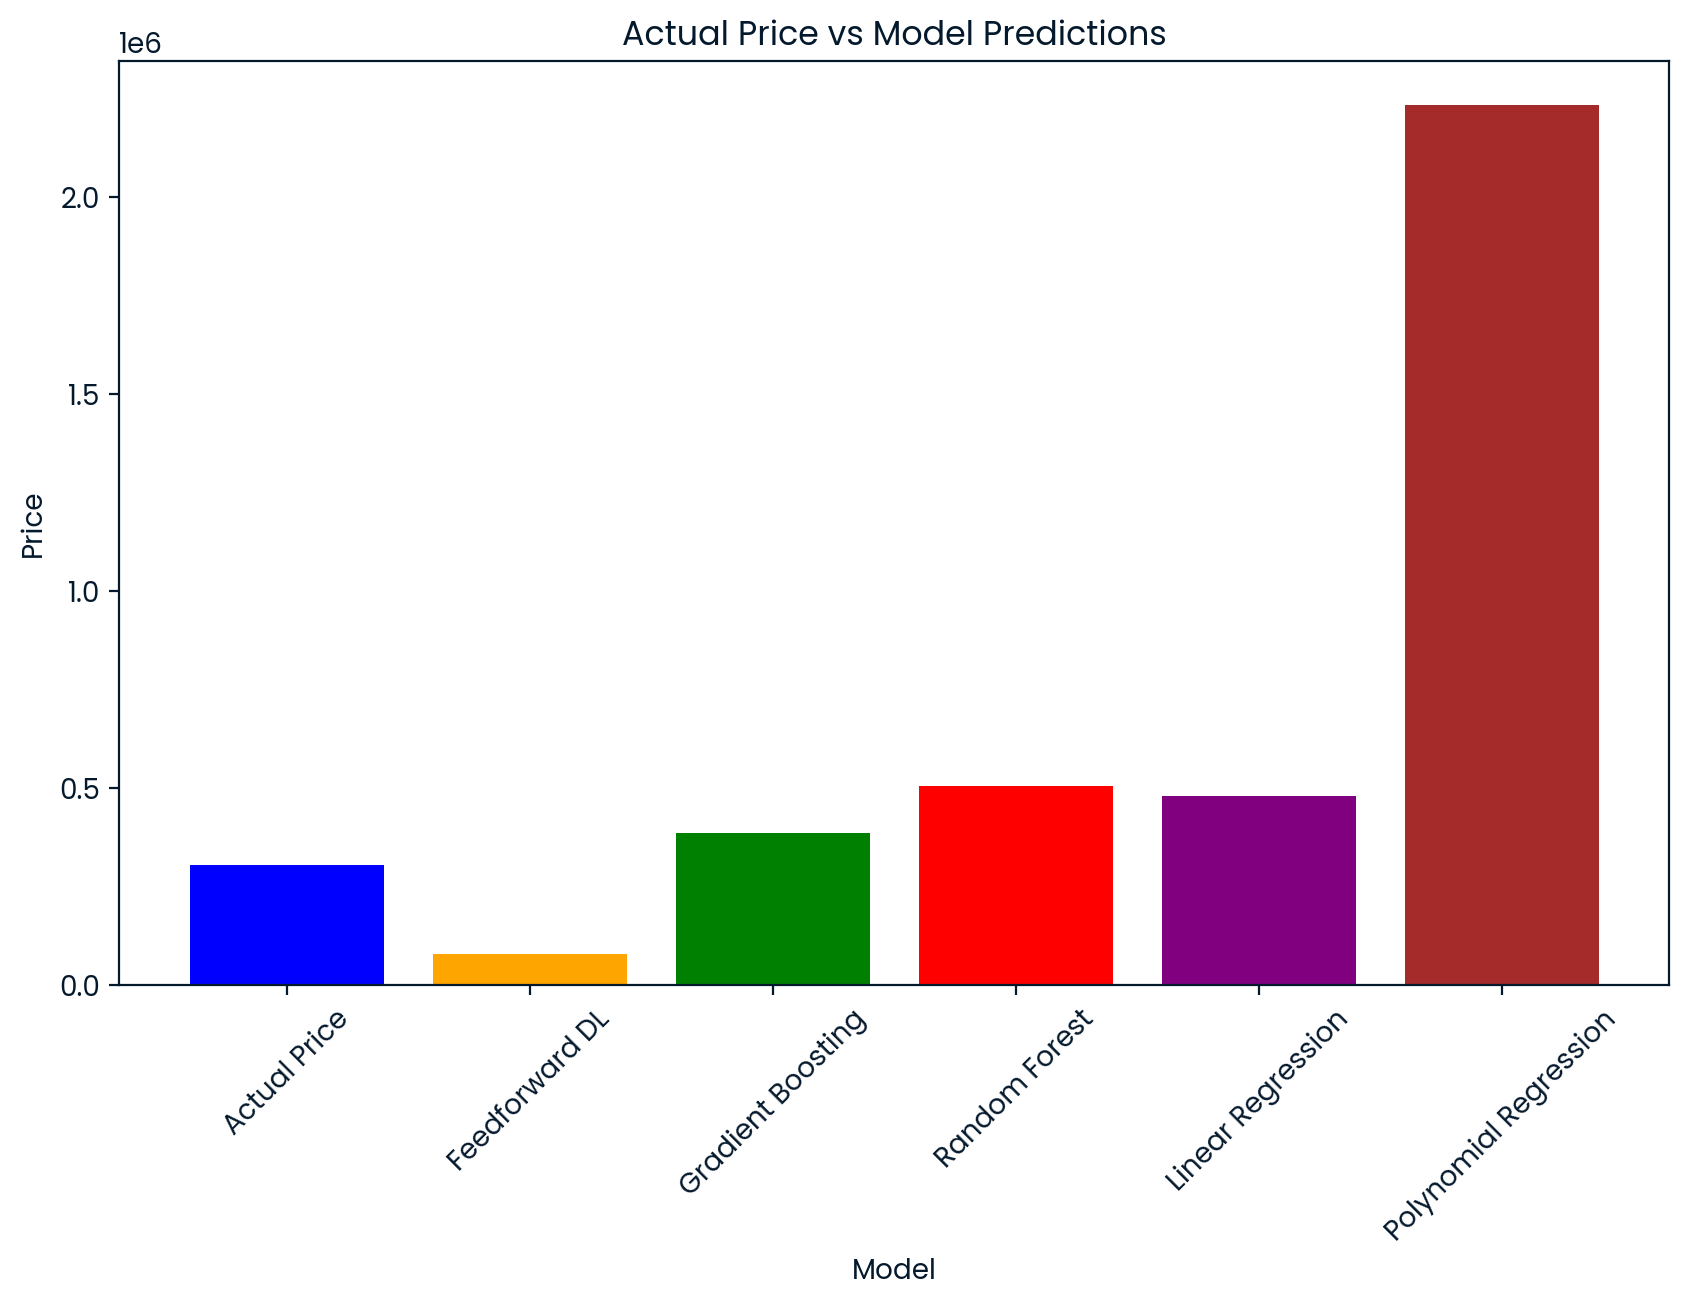

In [50]:
actualPrice = 305000

house_data = {
    'city': "pflugerville",
    'zipcode': 78660,
    'latitude': 30.4306316376,
    'longitude': -97.6630783081,
    'propertyTaxRate': 1.98,
    'garageSpaces': 2,
    'hasAssociation': 1,
    'hasCooling': 1,
    'hasGarage': 1,
    'hasHeating': 1,
    'hasSpa': 0,
    'hasView': 0,
    'homeType': "Single Family",
    'parkingSpaces': 2,
    'yearBuilt': 2012,
    'numPriceChanges': 5,
    'latest_salemonth': 9,
    'latest_saleyear': 2019,
    'numOfAccessibilityFeatures': 0,
    'numOfAppliances': 5,
    'numOfParkingFeatures': 2,
    'numOfPatioAndPorchFeatures': 1,
    'numOfSecurityFeatures': 3,
    'numOfWaterfrontFeatures': 0,
    'numOfWindowFeatures': 1,
    'numOfCommunityFeatures': 0,
    'lotSizeSqFt': 6011,
    'livingAreaSqFt': 2601,
    'numOfBathrooms': 3,
    'numOfBedrooms': 4,
    'numOfStories': 2,
}

def userData():
    answers = {'yes': 1, 'no': 0}  # Added this dictionary to map yes/no to 1/0
    
    price = input("Enter the actual price for the house: ")
    actual_price = int(price)
    
    for key in house_data:
        if key == "city":
            value = input("Enter the city in Austin: ")
            house_data[key] = value
        elif key == "zipcode":
            value = input("Enter the zipcode: ")
            house_data[key] = int(value)
        elif key == "latitude":
            value = input("Enter the latitude: ")
            house_data[key] = float(value)
        elif key == "longitude":
            value = input("Enter the longitude: ")
            house_data[key] = float(value)
        elif key == "propertyTaxRate":
            value = input("Enter the property tax rate: ")
            house_data[key] = float(value)
        elif key == "garageSpaces":
            value = input("Enter the number of garage spaces: ")
            house_data[key] = int(value)
        elif key == "hasAssociation":
            val = input("Does the property have a housing association? (yes/no): ")
            house_data[key] = answers[val]
        elif key == "hasCooling":
            val = input("Does the property have cooling? (yes/no): ")
            house_data[key] = answers[val]
        elif key == "hasGarage":
            val = input("Does the property have a garage? (yes/no): ")
            house_data[key] = answers[val]
        elif key == "hasHeating":
            val = input("Does the property have heating? (yes/no): ")
            house_data[key] = answers[val]
        elif key == "hasSpa":
            val = input("Does the property have a spa? (yes/no): ")
            house_data[key] = answers[val]
        elif key == "hasView":
            val = input("Does the property have a view? (yes/no): ")
            house_data[key] = answers[val]
        elif key == "homeType":
            value = input("What is the property home type? ")
            house_data[key] = value
        elif key == "parkingSpaces":
            value = input("How many parking spaces does the property have? ")
            house_data[key] = int(value)
        elif key == "yearBuilt":
            value = input("What is the year the property was built? ")
            house_data[key] = int(value)
        elif key == "numPriceChanges":
            value = input("How many price changes has the property undergone? ")
            house_data[key] = int(value)
        elif key == "latest_salemonth":
            value = input("What is the latest sale month? ")
            house_data[key] = int(value)
        elif key == "latest_saleyear":
            value = input("What is the latest sale year? ")
            house_data[key] = int(value)
        elif key == "numOfAccessibilityFeatures":
            value = input("Enter the number of accessibility features: ")
            house_data[key] = int(value)
        elif key == "numOfAppliances":
            value = input("How many appliances does the property have? ")
            house_data[key] = int(value)
        elif key == "numOfParkingFeatures":
            value = input("How many parking features does the property have? ")
            house_data[key] = int(value)
        elif key == "numOfPatioAndPorchFeatures":
            value = input("How many patio and porch features? ")
            house_data[key] = int(value)
        elif key == "numOfSecurityFeatures":
            value = input("How many security features? ")
            house_data[key] = int(value)
        elif key == "numOfWaterfrontFeatures":
            value = input("Number of waterfront features: ")
            house_data[key] = int(value)
        elif key == "numOfWindowFeatures":
            value = input("Number of window features: ")
            house_data[key] = int(value)
        elif key == "numOfCommunityFeatures":
            value = input("Number of community features: ")
            house_data[key] = int(value)
        elif key == "lotSizeSqFt":
            value = input("What is the lot size in square feet? ")
            house_data[key] = int(value)
        elif key == "livingAreaSqFt":
            value = input("What is the living area in square feet? ")
            house_data[key] = int(value)
        elif key == "numOfBathrooms":
            value = input("How many bathrooms does the property have? ")
            house_data[key] = int(value)
        elif key == "numOfBedrooms":
            value = input("How many bedrooms does the property have? ")
            house_data[key] = int(value)
        elif key == "numOfStories":
            value = input("The number of stories? ")
            house_data[key] = int(value)

userData()

# Function call to display predictions
housesPriceEstimator(house_data, actualPrice)